## Banglore Home Price Prediction

### Problem Statement

- #### This project predicts the Home Prices in Banglore based on the Home's location, size of home in BHK, total square-feet area, and number of bathrooms

### Data Collection

- #### Dataset Source - https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data
- #### The data consists of 9 columns and 13320 rows

#### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
# Head ot the dataframe
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Shape of the dataset
df.shape

(13320, 9)

In [4]:
# Displaying Columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Data Cleaning: Handling Null values

In [5]:
# Check for null values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
# Check for duplicate values
df.duplicated().sum()

529

In [7]:
# Removing duplicates
df=df.drop_duplicates()

In [8]:
df.shape

(12791, 9)

In [9]:
# Check for categories in each column
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
# Display Information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [11]:
# Dropping unwanted features/columns for model building

df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(12791, 5)

In [12]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df3=df2.dropna()
df3.isnull().sum().any()

False

In [16]:
df3.nunique()

location      1304
size            31
total_sqft    2067
bath            19
price         1955
dtype: int64

### Feature Engineering

In [17]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### Exploring size and Adding new integer feature for bhk

In [18]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
# Splitting the size and taking the first value
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


#### Exploring total_sqft

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
# Displaying dataframe with total_sqft having other measurements
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


- From above we can see that total_sqft are in different measurements, so applying imputation on those values.Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion and dropping the rest

In [23]:
# Function to find the average of total_sqft such as be a range (e.g. 2100-2850)
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
       return None

In [24]:
#df2=df.copy()
#f2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)

In [25]:
#df2.head()

In [26]:
'''
def total_sqft_conversions(x):
    text=""
    numbers=""
    res=[]
    for i in str(x):
        if(i.isdigit()):
            numbers+=i
        else:
            text+=i
    res.append(text)
    res.append(numbers)
    if res[0]=='Sq. Yards':
        return (int(res[1])*9)
    elif res[0]=='Acres':
        return (int(res[1])*43560)
    elif res[0]=='Sq. Meter':
        return (int(res[1])*10.7)
    elif res[0]=='Perch':
        return (int(res[1])*272.25)
    try:
        return float(x)
    except:
        return None
        '''

'\ndef total_sqft_conversions(x):\n    text=""\n    numbers=""\n    res=[]\n    for i in str(x):\n        if(i.isdigit()):\n            numbers+=i\n        else:\n            text+=i\n    res.append(text)\n    res.append(numbers)\n    if res[0]==\'Sq. Yards\':\n        return (int(res[1])*9)\n    elif res[0]==\'Acres\':\n        return (int(res[1])*43560)\n    elif res[0]==\'Sq. Meter\':\n        return (int(res[1])*10.7)\n    elif res[0]==\'Perch\':\n        return (int(res[1])*272.25)\n    try:\n        return float(x)\n    except:\n        return None\n        '

In [27]:
#f=total_sqft_conversions('1Acres')
#print(f)

In [28]:
#df2['total_sqft']=df2['total_sqft'].apply(total_sqft_conversions)
#df2.head(20)

In [29]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [30]:
df4.loc[40]

location      Murugeshpalya
size                  2 BHK
total_sqft           1296.0
bath                    2.0
price                  81.0
bhk                       2
Name: 40, dtype: object

##### Creating new feature price-per-square-ft

In [31]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Exploring location

In [32]:
len(df5.location.unique())

1298

In [33]:
# Removing the spaces at the beginning and end of the string
df5['location']=df5['location'].apply(lambda x: x.strip(' '))
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               516
Sarjapur  Road           372
Electronic City          289
Kanakpura Road           240
Thanisandra              230
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [34]:
# Getting number of locations which is present less than 10 times in the dataframe
len(location_stats[location_stats<10])

1037

### Dimensionality Reduction

- Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [35]:
# Display dataframe present less than 10 times
location_stats_less_than_10=location_stats[location_stats<10]
location_stats_less_than_10

location
4th Block Koramangala    9
Chennammana Kere         9
Mathikere                9
Kaverappa Layout         9
Vignana Nagar            9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kannur                   1
whitefiled               1
Name: location, Length: 1037, dtype: int64

In [36]:
len(df5.location.unique())

1287

In [37]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Exploring bhk column

### Handling Outliers
- normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [38]:
df5[df5.total_sqft/df5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13221,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091


- From above above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [39]:
df5.shape

(12671, 7)

In [40]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(11937, 7)

#### Exploring and Statistics for price_per_sqft

In [41]:
df6.price_per_sqft.describe()

count     11937.000000
mean       6368.485176
std        4233.059425
min         267.829813
25%        4250.000000
50%        5330.490405
75%        6969.508401
max      176470.588235
Name: price_per_sqft, dtype: float64

- Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

<Axes: xlabel='price_per_sqft', ylabel='Count'>

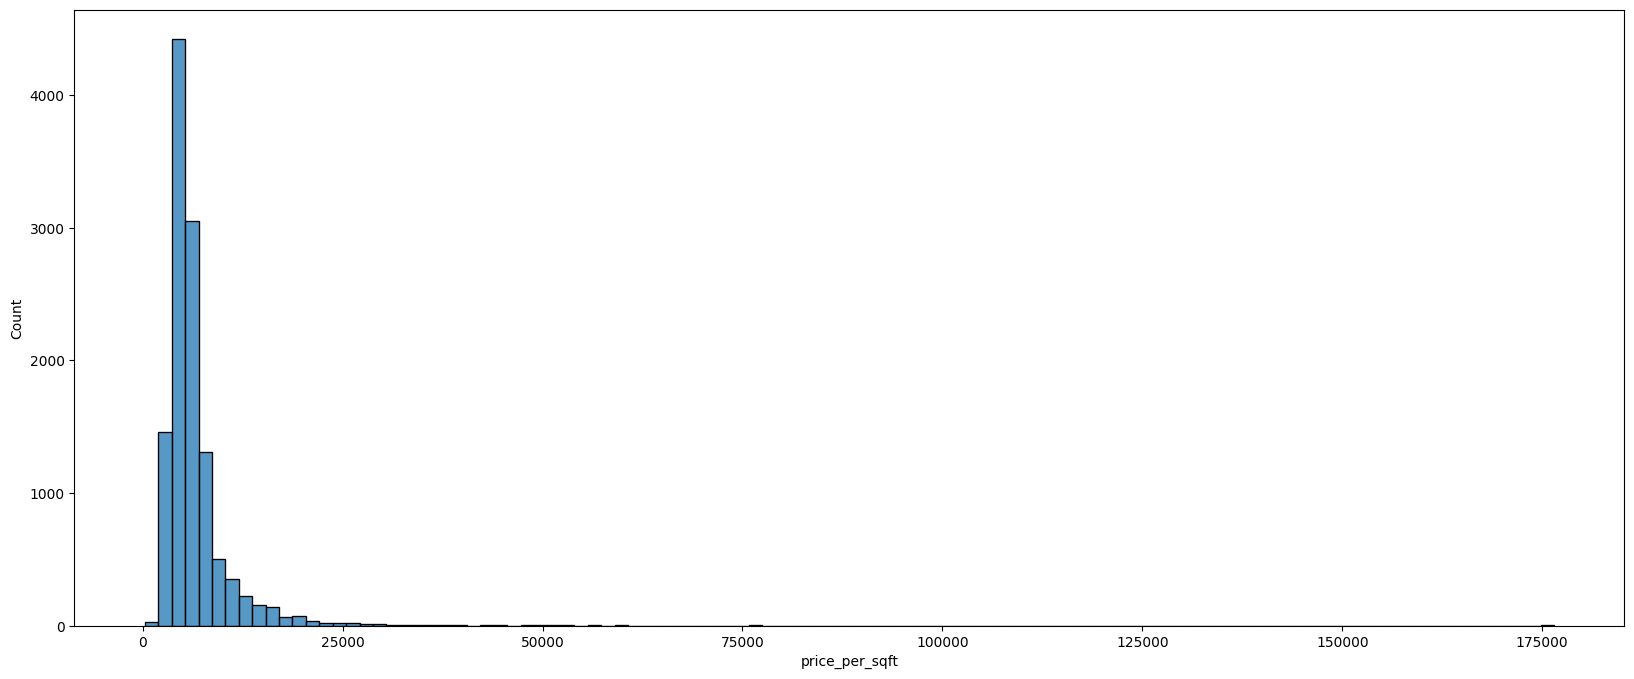

In [42]:
plt.figure(figsize=(20,8))
sns.histplot(df6.price_per_sqft,bins=105)

#### Filtering the datapoints beyond 1 std using mean and Standard Deviation for removing the extreme cases

In [43]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([reduced_df,df_out],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(9812, 7)

#### Doing a check if the property price of 3 bhk> property price of 3 bhk for the same sqft

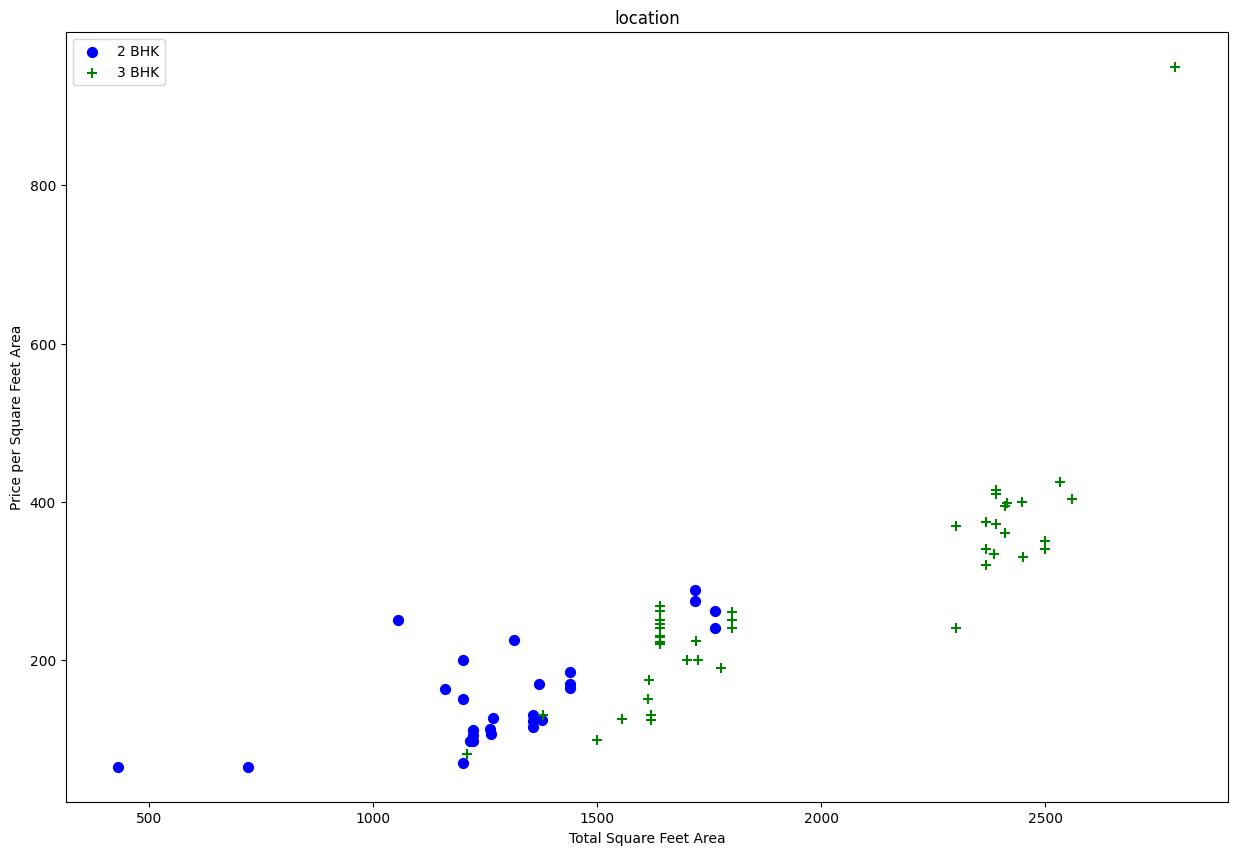

In [44]:

def scatter_plot_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet Area')
    plt.title('location')
    plt.legend()

scatter_plot_chart(df5,'Rajaji Nagar')

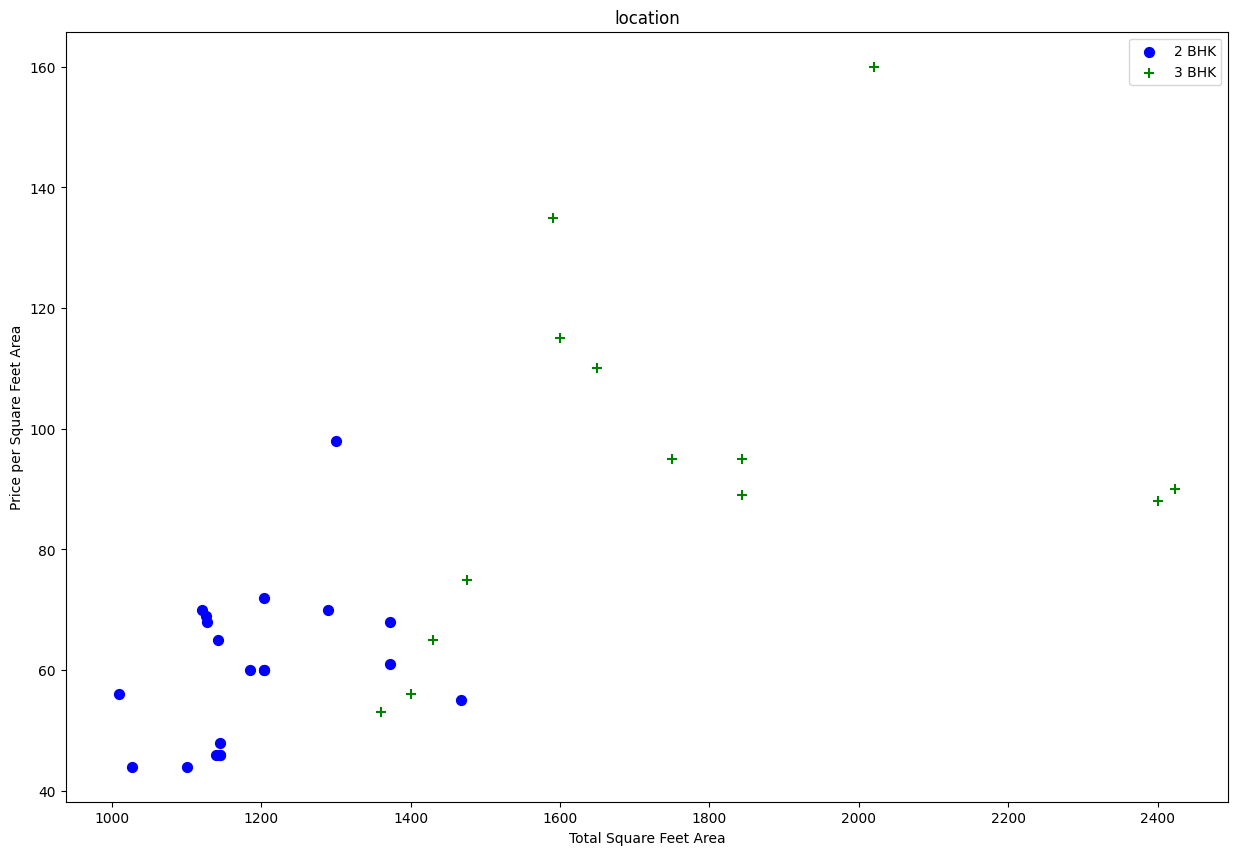

In [45]:
scatter_plot_chart(df5,'HSR Layout')

#### Removing some of the outliers where price of bhk2 is more than bhk3 and performing data cleaning

In [46]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)
            return df.drop(exclude_indices,axis='index')
                
df8 = remove_bhk_outliers(df7)
df8.shape


(9812, 7)

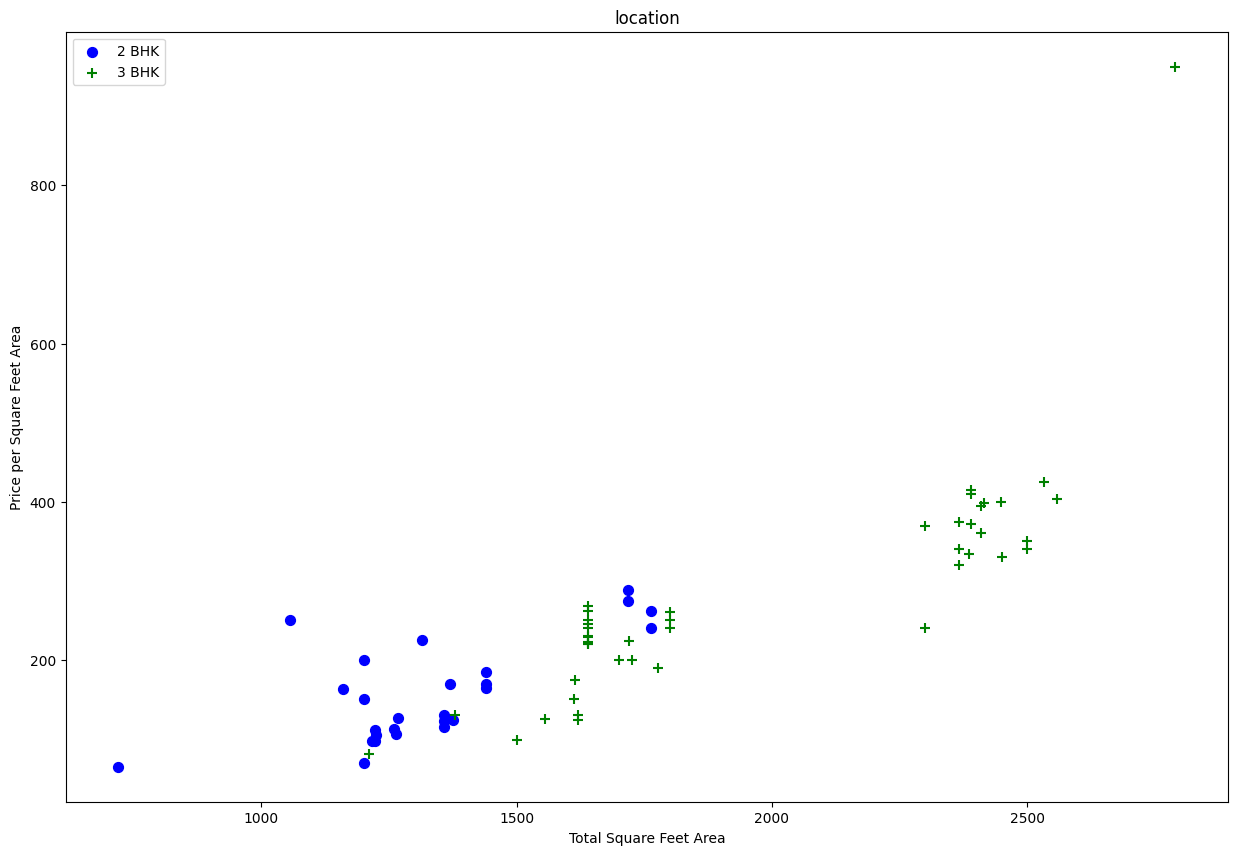

In [47]:
scatter_plot_chart(df6,"Rajaji Nagar")


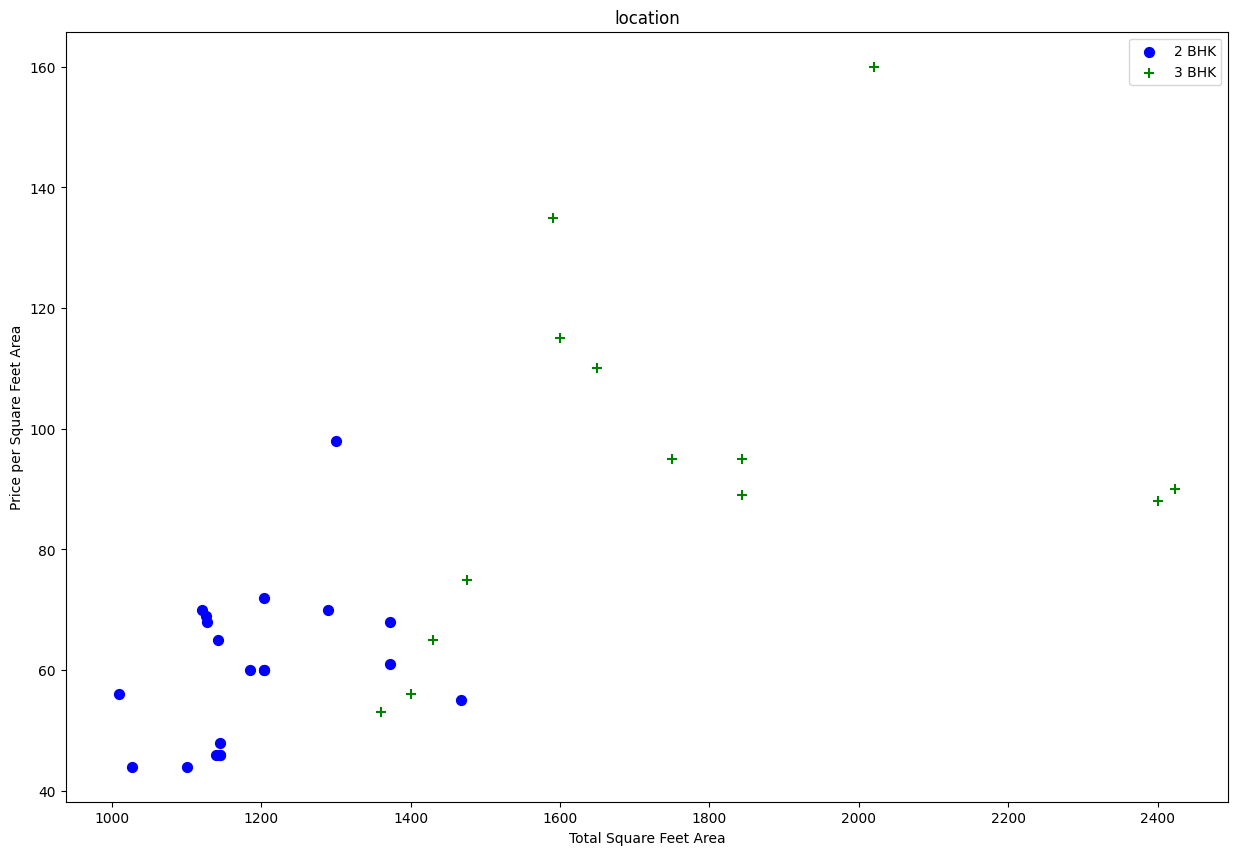

In [48]:
scatter_plot_chart(df6,'HSR Layout')

- Based on above charts we can see that data points which are outliers and are being removed due to remove_bhk_outliers function

Text(0, 0.5, 'Count')

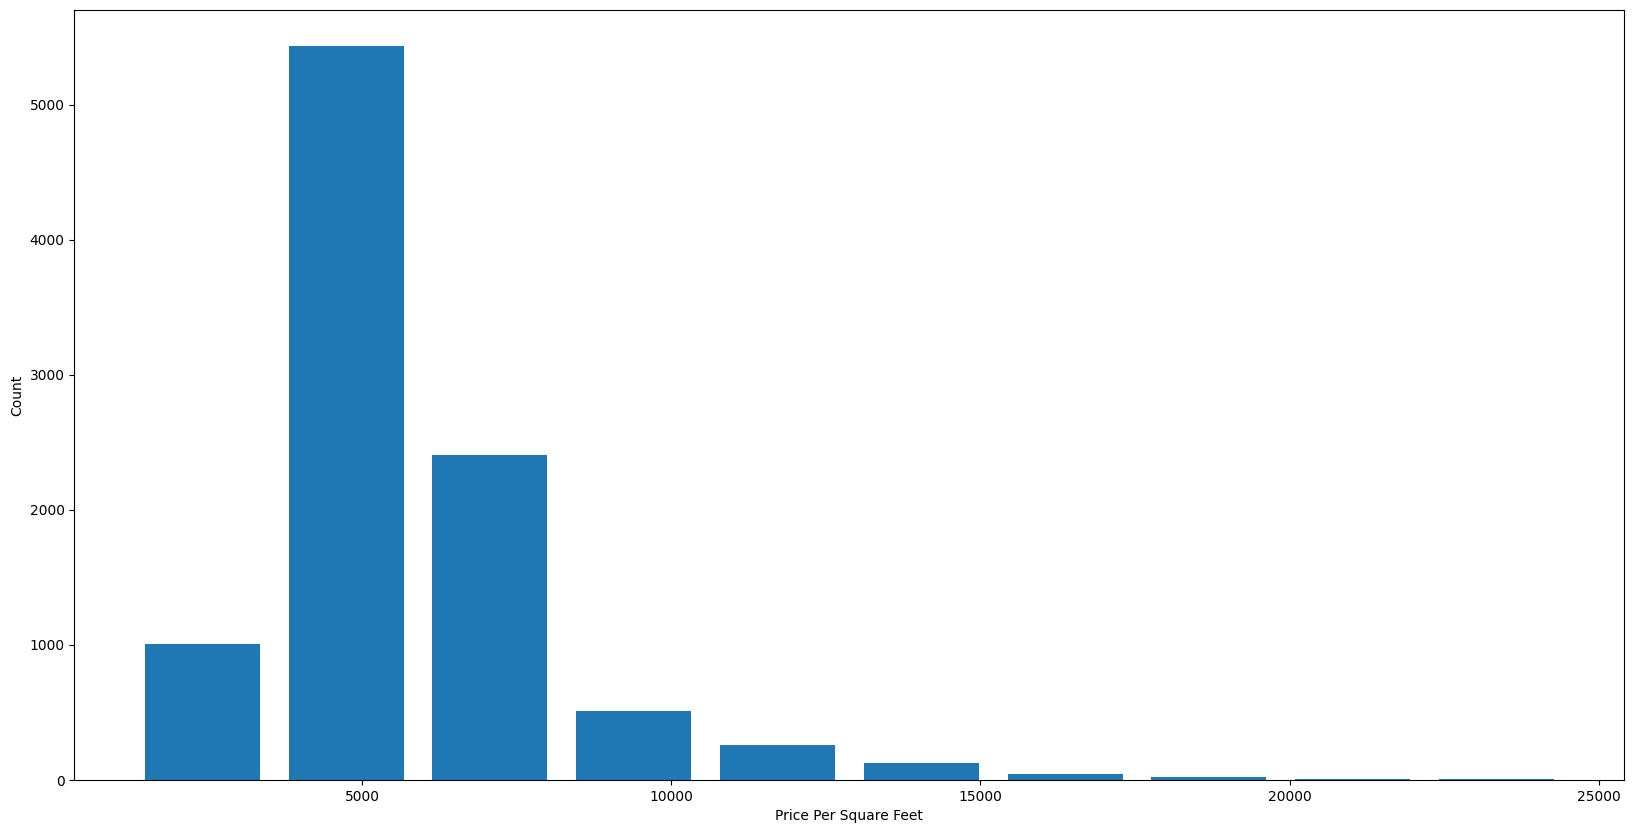

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Exploring Bathrooms Feature and Outliers Removal

In [50]:
df8.bath.unique()

array([ 4.,  2.,  3.,  8.,  1.,  9.,  5.,  6.,  7., 12., 16., 13., 14.])

Text(0, 0.5, 'Count')

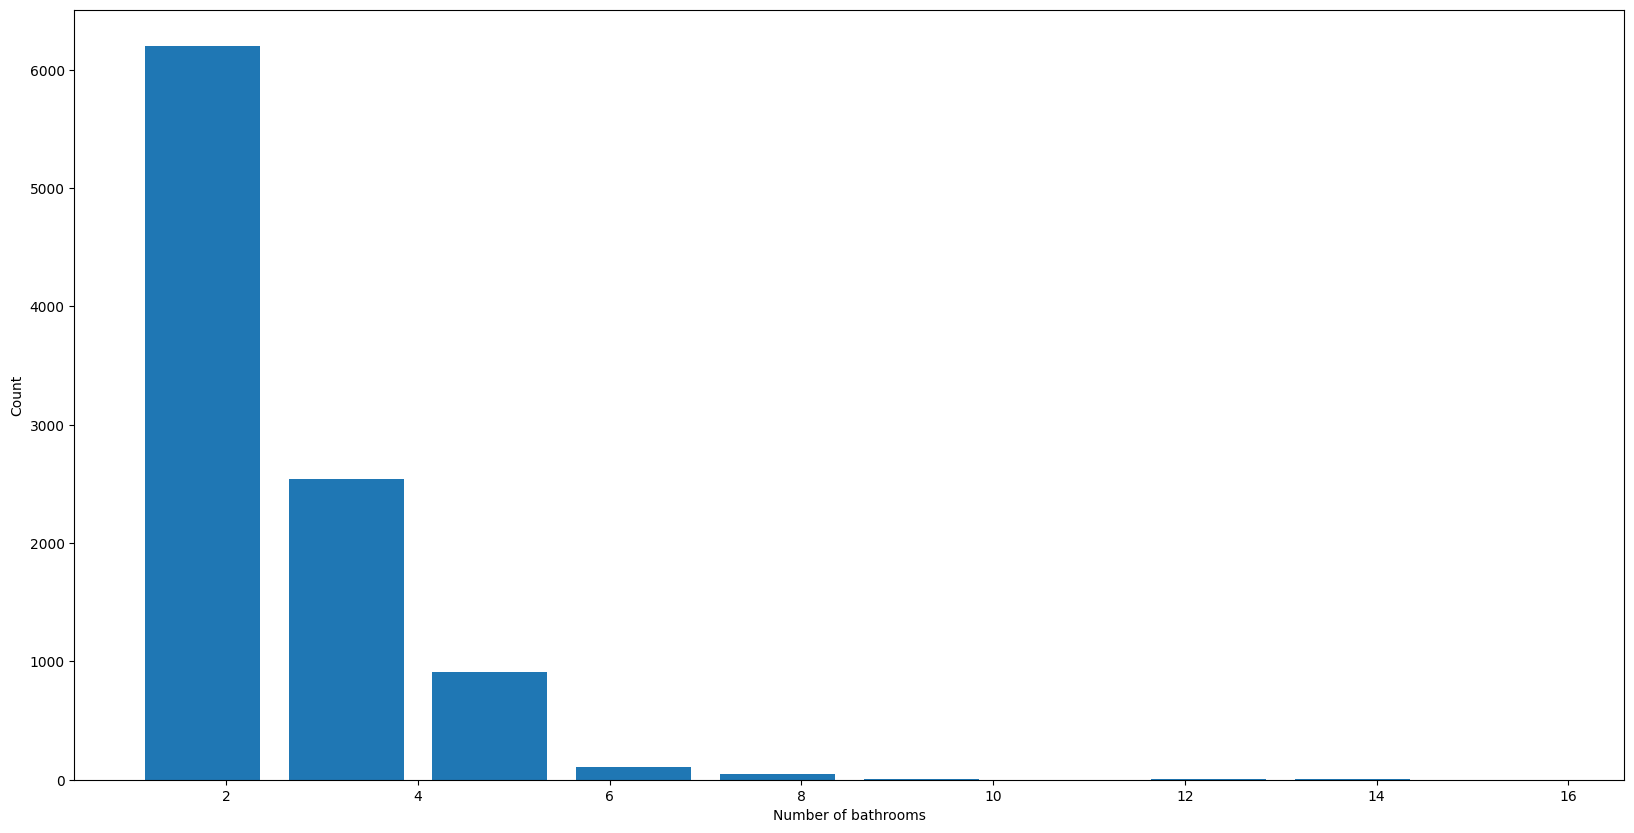

In [51]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [52]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
534,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
621,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
1316,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
1634,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
4738,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9262,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152


- #### It is unusual to have 2 more bathrooms than number of bedrooms in a home


In [53]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
462,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
3502,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
4771,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
8277,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9262,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152


- Here we consider that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [54]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(9715, 7)

In [55]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.0,3,10469.314079
1,other,2 BHK,1100.0,2.0,48.0,2,4363.636364
2,other,3 BHK,1250.0,3.0,56.0,3,4480.000000
3,other,2 BHK,869.0,2.0,36.0,2,4142.692750
4,other,2 BHK,1270.0,2.0,50.0,2,3937.007874


In [56]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,other,2770.0,4.0,290.0,3
1,other,1100.0,2.0,48.0,2
2,other,1250.0,3.0,56.0,3


### Use One Hot Encoding For Location

In [57]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [58]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,other,2770.0,4.0,290.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,other,1100.0,2.0,48.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,other,1250.0,3.0,56.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,other,869.0,2.0,36.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,other,1270.0,2.0,50.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df12=df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,290.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1100.0,2.0,48.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1250.0,3.0,56.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,869.0,2.0,36.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1270.0,2.0,50.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Building

In [60]:
df12.shape

(9715, 254)

In [61]:
X = df12.drop(['price'],axis='columns')
y = df12.price

In [62]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1100.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1250.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,869.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1270.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
y.head()

0    290.0
1     48.0
2     56.0
3     36.0
4     50.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8657276881910937

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85475989, 0.79417127, 0.83556034, 0.82861133, 0.82353253])

- ##### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.827327,{'fit_intercept': True}
1,lasso,0.687128,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.736285,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### Test the model for few properties


In [68]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [69]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


83.83911875101785

In [70]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


85.54354810054858

In [71]:
predict_price('Indira Nagar',1000, 2, 2)


170.40802931624222

In [72]:
predict_price('Indira Nagar',1000, 3, 3)


172.11245866577295

### Exporting the tested model to a pickle file


In [73]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [74]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))